In [32]:
##Best classifier among k-Nearest Neighbour, Decision Tree, Support Vector Machine,Logistic Regression on bank loan customer dataset

In [ ]:
   
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [63]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2018-09-21 04:38:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2018-09-21 04:38:32 (122 MB/s) - 'loan_train.csv' saved [23101/23101]



In [64]:
df = pd.read_csv("loan_train.csv")
# take a look at the dataset
#df.head


In [65]:
df.shape

(346, 10)

In [66]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [67]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [68]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



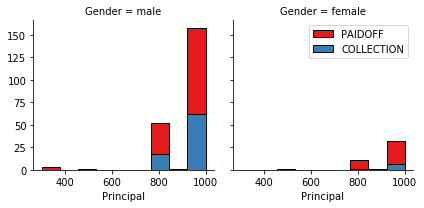

In [69]:
import seaborn as sns

bins=np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

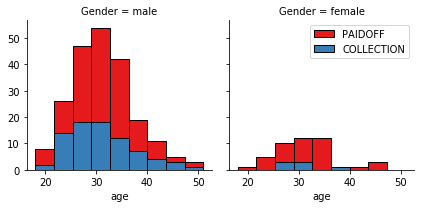

In [70]:
bins=np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

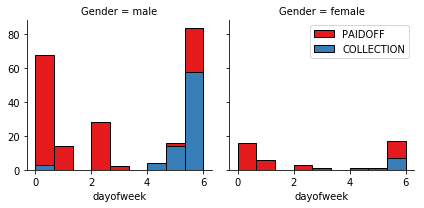

In [71]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins=np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [72]:
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [73]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [74]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [75]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [76]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [77]:
Feature=df[['Principal','terms','age','Gender','weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [78]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [146]:
y = df['loan_status'].values
#y[0:5]

In [147]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38, -0.88,  1.15]])

In [81]:
#K Nearest Neighbour

In [148]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
#print ('Train set:', X_train.shape,  y_train.shape)
#print ('Test set:', X_test.shape,  y_test.shape)

In [149]:
from sklearn.neighbors import KNeighborsClassifier
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X,y)
neigh



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [150]:
#X_train1, X_test1, y_train1, y_test1 = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X.shape,  y.shape)
#print ('Test set:', X_test1.shape,  y_test1.shape)

Train set: (346, 8) (346,)


In [87]:
#Decision trees classifier 

X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [88]:
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [153]:
#X_testdecisiontree = X
#y_testdecisiontree=y
X_traindecisiontree=X
y_traindecisiontree=y
#X_testdecisionttree.shape
#X_traindecisiontree.shape
#y_traindecisiontree.shape

In [154]:
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [155]:
loanTree.fit(X_traindecisiontree,y_traindecisiontree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
#SVM classifier

In [102]:
df.head
df.describe
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [103]:
df.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                     int64
dayofweek                  int64
weekend                    int64
dtype: object

In [159]:
from sklearn import svm
svmclf = svm.SVC(kernel='rbf')
svmclf.fit(X, y) 


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [157]:
#logistic regression
X.size

2768

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,y)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
#Model Evaluation using Test set
#KNN neigh
#SVM  svmclf
#Decisiontree   loantree
#Logistic regression   LR
#test data X y

In [160]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2018-09-21 05:08:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: 'loan_test.csv'

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2018-09-21 05:08:37 (379 MB/s) - 'loan_test.csv' saved [3642/3642]



In [162]:
df1 = pd.read_csv('loan_test.csv')
df1.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [163]:

# features Principal 	terms 	age 	Gender 	weekend 	Bechalor 	High School or Below 	college
Feature1=df1

df1=df1.T.drop_duplicates().T
df1['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df1.head()
df1['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df1.head()

Feature1=df1[['Principal','terms','age','Gender','weekend']]

Feature1=pd.concat([Feature1,pd.get_dummies(df1['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)


In [166]:
X_test=Feature1
y_test = df1['loan_status'].values
y_test[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [167]:
X_test.size
y_test.size

54

In [168]:
X_test.shape

(54, 8)

In [169]:
X_test
y_test




array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION'], dtype=object)

In [171]:
#Score for KNN
from sklearn import metrics
yhatKNN = neigh.predict(X_test)
yhat[0:5]
print("KNN Train set Accuracy: ", metrics.accuracy_score(y, neigh.predict(X)))
print("KNN Test set Accuracy: ", metrics.accuracy_score(y_test, yhatKNN))


KNN Train set Accuracy:  0.820809248555
KNN Test set Accuracy:  0.259259259259


In [172]:
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X,y)
neigh
yhatKNN = neigh.predict(X_test)
yhatKNN[0:5]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y, neigh.predict(X)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatKNN))

Train set Accuracy:  0.809248554913
Test set Accuracy:  0.722222222222


In [173]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X,y)
    yhatKNN=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhatKNN)

    
    std_acc[n-1]=np.std(yhatKNN==y_test)/np.sqrt(yhatKNN.shape[0])

mean_acc

array([ 0.54,  0.26,  0.61,  0.48,  0.72,  0.72,  0.74,  0.74,  0.74])

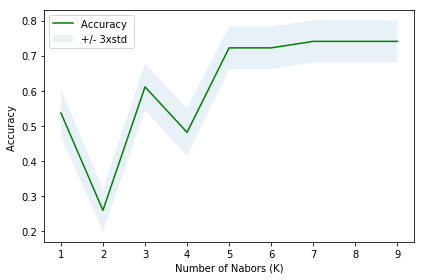

In [174]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [175]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.740740740741 with k= 7


In [179]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
jaccardKNN = jaccard_similarity_score(y_test, yhatKNN)
print (jaccardKNN)
f1_scoreKNN=f1_score(y_test, yhatKNN, average='weighted')  
print(f1_scoreKNN)


0.740740740741
0.630417651694


/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [180]:
#Decision Tree scores
predTree = loanTree.predict(X_test)
print (predTree [0:5])
print (y_test)

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'COLLECTION' 'COLLECTION' 'COLLECTION' 'COLLECTION' 'COLLECTION'
 'COLLECTION' 'COLLECTION' 'COLLECTION' 'COLLECTION' 'COLLECTION'
 'COLLECTION' 'COLLECTION' 'COLLECTION']


In [181]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.740740740741


In [189]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
jaccardDT = jaccard_similarity_score(y_test, predTree)
print (jaccardDT)
f1_scoreDT=f1_score(y_test, predTree, average='weighted')  
print(f1_scoreDT)


0.740740740741
0.630417651694


/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [191]:
#SVM
yhatSVM = svmclf.predict(X_test)
yhatSVM [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [270]:
from sklearn.metrics import average_precision_score
y_score = svmclf.decision_function(X_test)
y_score.shape
y_score
y_score = (y_score>=.5).astype(int)
y_score


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [271]:
labels = set(y_test)
labels
lookupTable = np.empty(len(labels), dtype='U21')
indexed_dataSet = np.zeros(y_test.size, dtype='int')
count = -1
for label in labels:
        count += 1
        indexed_dataSet[np.where(y_test == label)] = count
        lookupTable[count] = label
indexed_dataSet

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [295]:
average_precision = average_precision_score(indexed_dataSet,y_score)
print('Decision Tree Average precision-recall score: {0:0.2f}'.format(average_precision))


Decision Tree Average precision-recall score: 0.26


In [296]:
#print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))


DecisionTrees's Accuracy:  0.259259259259


In [300]:
#SVM evaluation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("\nSVM Accuracy:",metrics.accuracy_score(y_test, yhatSVM))

from sklearn.metrics import classification_report, confusion_matrix
import itertools


SVM Accuracy: 0.740740740741


In [285]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
jaccardSVM = jaccard_similarity_score(y_test, yhatSVM)
print (jaccardSVM)
f1_scoreSVM=f1_score(y_test, yhatSVM, average='weighted')  
print(f1_scoreSVM)

0.740740740741
0.630417651694


/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [286]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 SVM classification report 
               precision    recall  f1-score   support

 COLLECTION       0.00      0.00      0.00        14
    PAIDOFF       0.74      1.00      0.85        40

avg / total       0.55      0.74      0.63        54

Confusion matrix, without normalization
[[40  0]
 [14  0]]


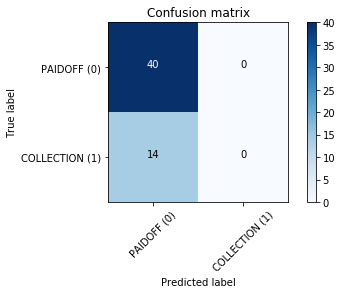

In [287]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhatSVM, labels=["PAIDOFF","COLLECTION"])
np.set_printoptions(precision=2)
print ("\n SVM classification report \n ",classification_report(y_test, yhatSVM))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF (0)','COLLECTION (1)'],normalize= False,  title='Confusion matrix')

In [197]:
#logistic regression
yhatLR = LR.predict(X_test)
yhatLR

array(['COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION'], dtype=object)

In [204]:
yhatLR_prob = LR.predict_proba(X_test)
yhatLR_prob
print (classification_report(y_test, yhatLR))
from sklearn.metrics import log_loss
log_lossLR=log_loss(y_test, yhatLR_prob)
print(log_lossLR)

             precision    recall  f1-score   support

 COLLECTION       0.26      1.00      0.41        14
    PAIDOFF       0.00      0.00      0.00        40

avg / total       0.07      0.26      0.11        54

23.3394775739


/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [316]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
jaccardLR = jaccard_similarity_score(y_test, yhatLR)
print (jaccardLR)
f1_scoreLR=f1_score(y_test, yhatLR, average='weighted')  
print(f1_scoreLR)
# Use score method to get accuracy of model



0.259259259259
0.106753812636


/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [331]:


#print("Logistic regression ",accuracy_score(y_test, yhatLR))

In [333]:
print("Logistic Regression")
print (classification_report(y_test, yhatLR))
print("\nLogistic regression accuracy score ",metrics.accuracy_score(y_test, yhatLR))

Logistic Regression
             precision    recall  f1-score   support

 COLLECTION       0.26      1.00      0.41        14
    PAIDOFF       0.00      0.00      0.00        40

avg / total       0.07      0.26      0.11        54


Logistic regression accuracy score  0.259259259259


/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [334]:
#Accuracy scores
print( "\nThe best accuracy in KNN was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
print("\nDecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print('\nDecision Tree Average precision-recall score: {0:0.2f}'.format(average_precision))
print("\nSVM Accuracy:",metrics.accuracy_score(y_test, yhatSVM))
print ("\n SVM classification report \n ",classification_report(y_test, yhatSVM))
print("\n\nLogistic regression accuracy score ",metrics.accuracy_score(y_test, yhatLR))
print ("\n\nLogistic Regression classification report \n \n ",classification_report(y_test, yhatLR))


The best accuracy in KNN was with 0.740740740741 with k= 7

DecisionTrees's Accuracy:  0.740740740741

Decision Tree Average precision-recall score: 0.26

SVM Accuracy: 0.740740740741

 SVM classification report 
               precision    recall  f1-score   support

 COLLECTION       0.00      0.00      0.00        14
    PAIDOFF       0.74      1.00      0.85        40

avg / total       0.55      0.74      0.63        54



Logistic regression accuracy score  0.259259259259


Logistic Regression classification report 
 
               precision    recall  f1-score   support

 COLLECTION       0.26      1.00      0.41        14
    PAIDOFF       0.00      0.00      0.00        40

avg / total       0.07      0.26      0.11        54



/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [299]:

print("Algorithm                     Jaccard            F1-score            LogLoss")
print("KNN                               %2.2f           %2.2f  " % (jaccardKNN, f1_scoreKNN))
print("SVM                               %2.2f           %2.2f  " % (jaccardSVM, f1_scoreSVM))
print("Decision Tree                     %2.2f           %2.2f  " % (jaccardDT, f1_scoreDT))
print("Logistic regression               %2.2f           %2.2f              %2.2f" %(jaccardLR, f1_scoreLR, log_lossLR))



Algorithm                     Jaccard            F1-score            LogLoss
KNN                               0.74           0.63  
SVM                               0.74           0.63  
Decision Tree                     0.74           0.63  
Logistic regression               0.26           0.11              23.34
